### Follow These Instructions

Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.

---
# Grade: /100 Mark(s)

# Assignment 2: Maximum Likelihood and Probabilities


### Maximum Likelihood

The poisson distribution https://en.wikipedia.org/wiki/Poisson_distribution is a discrete probability distribution often used to describe count-based data, like how many snowflakes fall in a day.

If we have count data $y$ that are influenced by a covariate or feature $x$, we can use the maximum likelihood principle to develop a regression model that estimates the mean of $Y$ given $X = x$.

In [ ]:
#Packages for this assignment
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
from scipy.special import gammaln
from sklearn import linear_model
np.random.seed(1654)

---
### Question 1: /5 Marks

The negative log likelihood for a Poisson random variable is

$\ell(\lambda; \mathbf{y}) = -\sum_{i=1}^N\Bigg(   y_{i}\cdot \ln(\lambda) - \lambda - \ln(y_i!) \Bigg)$.

(*Attempt this at home trying to arrive at this likelihood function starting off from the original PMF*)

Here, $\mathbf{y}$ is a vector of counts and $\lambda$ is a scalar value.

Write a function called `poissonNegLogLikelihood` that takes a vector of counts $\mathbf{y}$ and a parameter $\lambda$ and returns the negative log likelihood.  The $\sum_{i} \ln(y!)$ does not affect the location of the maximum, so you may omit the $ \ln(y!)$ term from your function.

Test your function by calling it with `lam = 1.3` and `y=np.array([2,1,0,0])` (it should give 4.4).

Answer the following below in markdown: What happens when you set an element of lam to 0 or a negative number and why?


#### Written Answer:

Answer: A lam of zero gives an error - The likelihood of making an observation when lam = 0 should be zero and the log likelihood -inf. Logarithms not defined for zero and negatives.

In [ ]:
def poissonNegLogLikelihood(lam,y):

    neg_log_lik =  -np.sum(y*np.log(lam)-lam)

    return neg_log_lik

lam=1.3
y=np.array([2,1,0,0])
print(poissonNegLogLikelihood(lam,y))

lam=np.array([1,0.5,1,3])
y=np.array([2,1,0,0])
print(poissonNegLogLikelihood(lam,y))

4.412907206597527
6.193147180559945


---
### Question 2: /8 Marks

Write a function called `poissonRegressionNegLogLikelihood` that takes as arguments a vector $\mathbf{y}$ of counts, a design matrix $\mathbf{X}$ of features for each count, and a vector $\mathbf{\beta}$ of parameters. The function should return the negative log likelihood of this dataset, assuming that each element of  $\mathbf{y}$ is independent and Poisson distributed with parameter $\lambda = \exp(\mathbf{X}\beta)$.

Hint: You can use `poissonNegLogLikelihood` in this answer!
Test your function by calling it with
* `b=np.array([1,2])`
* `X=np.array([[1,2,3],[2,3,1]]).T`
* `y=np.array([0,2,10])`


In [ ]:
def poissonRegressionNegLogLikelihood(b, X, y):
    lam = np.exp(X @ b)
    # lam is technically a vector here, so why can we pass it to poissonNegLogLikelihood
    # when that function was intended to take a scalar?
    # The answer is vectorization.  So long as lam and y have the same shape, everything should work as expected
    neg_log_lik = poissonNegLogLikelihood(lam, y)
    return neg_log_lik

b=np.array([1,2])
X=np.array([[1,2,3],[2,3,1]]).T
y=np.array([0,2,10])
poissonRegressionNegLogLikelihood(b, X, y)

3211.7843052468816

---
### Question 3: /6 Marks

a) In `poissonRegressionNegLogLikelihood`, why did we apply the exponential function to $\mathbf{X}\beta$?  Hint: Can an exponential ever be negative?

b) What might have happened had we just passed $\lambda = \mathbf{X}\beta$?


#### Written Answer:

a) The expoential is applied so as to constrain lambda to be positive

b) Using a linear function in place of lamba might allow for negative lambda

---
### Question 4: /4 Marks

Write a function called `modelPrediction` which accepts as its first argument a vector of coefficents $\beta$ and a design matrix $\mathbf{X}$.  The function should return predictions of the form $\widehat{\mathbf{y}} = \exp(\mathbf{X}\beta)$.

Hint: Numpy implements the exponential using `np.exp`.  

Test your function by calling it with
* `b=np.array([1,2])`
* `X=np.array([[1,2,3],[2,3,1]]).T`

In [ ]:
def modelPrediction(b,X):
    yhat = np.exp(X @ b)
    return yhat

b=np.array([1,2])
X=np.array([[1,2,3],[2,3,1]]).T
modelPrediction(b,X)

array([ 148.4131591 , 2980.95798704,  148.4131591 ])

---
### Question 5: /14 Marks

Write a function called `fitModel` which accepts as its first argument argument a design matrix $\mathbf{X}$ and as its second argument a vector of outcome counts $\mathbf{y}$. The function should return the maximum likelihood estimates for the coefficients of a Poisson regression of $\mathbf{y}$ onto $\mathbf{X}$.

Test your function by calling it with
* `X=np.array([[1,2,3],[2,3,1]]).T`
* `y=np.array([0,2,10])`

What is your estimated b?

In [ ]:
def fitModel(X,y):
    # Need to give the optimizer a guess of where to start
    # Zeros sound good to me
    beta_start = np.zeros(X.shape[1])
    # When we call the optimizer this time around, we set jac=False (the default) since our objective function
    # does not return gradients.  The optimizer will numerically approximate the gradients if we set jac=False
    # which can sometimes (but rarely) come back to bite us.
    # Luckily, the likelihood is well behaved (or as we say in stats, "satisfies mild regularity conditions")
    # and so letting the optimizer compute the gradient is just fine.
    mle = minimize(poissonRegressionNegLogLikelihood, beta_start, args=(X,y))
    # The optimizer stores the coefficients under the .x method
    # So call mle.x to get the coefficients
    betas = mle.x
    return betas

X = np.array([[1,2,3],[2,3,1]]).T
y = np.array([0,2,10])
b = fitModel(X,y)
print(b)

[ 0.94827556 -0.5295352 ]


---
### Question 6: /14 Mark(s)

Load in the data from `poisson_regression_data.csv`. Plot a scatterplot of the data. Fit a poisson regression to this data using the functions you wrote above.  Plot the model predictions over $x \in [-2,2]$ on the same graph as the scatterplot of the data.  

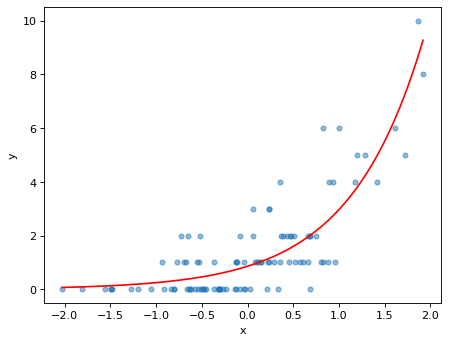

In [ ]:
# Loading in the data.  This is pretty standard
df = pd.read_csv('poisson_regression_data.csv')

fig, ax = plt.subplots(dpi = 80)
# Scatter the data.  Pretty standard
df.plot.scatter('x','y', ax = ax, alpha = 0.5)

# Fit the model.  You can use your functions.  First step is to construct the design matrix X
x = df.x.values
# Add intercept
X = np.c_[np.ones(x.size), x]

# Now, we can find the betas by calling fitModel.  fitModel should optimize the poissonRegressionNegLogLikelihood
y= df.y.values
betas = fitModel(X,y)

# We need to predict on data from -2 to 2.
# We need to first create an array of linearly spaced points between -2 and 2
# Then, we need to turn that into a design matrix
newx = np.linspace(x.min(),x.max(),1001)
# Add intercept
newX = np.c_[np.ones(newx.size), newx]

# We can use the betas we found above to make new predictions
# Here is where we use modelPrediction
y_predicted = modelPrediction(betas,newX)

#Finally, plot the predictions on the same axis and color the predictions red
ax.plot(newx,y_predicted,color = 'red')
plt.show()

---
### Question 7: /14 Marks

We wish to do an experiment to determine if ants search for food using a random search or directed search method. To help design the experiment we first will run some simulations. In the experiment, ants are placed inside a 50 mm $\times$ 50 mm box. They cannot climb the wall, but can escape through an opening of size 10 mm in the wall. Repeated measurements of how far an ant travels in 1 second show an average speed of 2 mm per second. Our simulation needs to determine the probability that an ant escapes the box in 600 seconds (hint: so your main iteration would look like `for t in range(600):`) if their motion is indeed random. Assume the ant is always initially placed in the center of the box and simulate a simple random walk in 2D on discrete time in this fashion: Have the ant live on a discrete lattice. The ant takes 2 mm to the left if a random number $u$ satisfies $u < 0.25$. The ant moves 2 mm to the right if $0.25 \leq u < 0.5$, the ant moves 2 mm up if $0.5 \leq u < 0.75$, and 2 mm down if $0.75 \leq u \leq 1.0$. $u$ is distributed uniformly between 0 and 1 (hint: use `np.random.uniform(low=0, high=1)` to generate it). If a step would take the ant into a wall, repeat the step until it is successful (result is still one time-step). With `attempts = np.linspace(10, 1000, 19)`, run your main iteration under the loop `for M in attempts:` and construct a dataframe with columns for number of attempts (i.e. `M`), number of escapes, and probability of escape for every `M`. Your dataframe would eventually look something like this with 19 rows and real values:

attempts | escapes| probability
---|---|---
10|x1|y1
65|x2|y2
...|...|...
1000|x19|y19

In [ ]:
attempts = np.linspace(10, 1000, 19)

x    = 50       # box size in x-direction
y    = 50       # box size in y-direction
time = 600      # in seconds

# coordinate of one arbitrary opening of size 5 mm
x_open = [20, 30]
y_open = y-1

# distance in millimeters that the ant travels per second
delta  = 2

number_of_attempts = np.zeros([0])
number_of_escapes = np.zeros([0])

for M in attempts:

    escape = 0
    for trial in range(int(M)):

        # initialize X and Y coordinates for the ant
        X = np.zeros([time])
        Y = np.zeros([time])

        # ant's initial location
        x_ant = x/2
        y_ant = y/2

        i = -1
        ## Main loop:
        for t in range(time):
            u = np.random.uniform(low=0.0, high=1.0) # generates uniform random number

            # in case you are interested to examine normal random distribution:
            # u = abs(np.random.normal()) # generates absolute normal random number

            if ( u < 0.25 ):
                x_ant = x_ant - delta
            if ( u >= 0.25 ) & ( u < 0.5 ):
                x_ant = x_ant + delta
            if ( u >= 0.5 )  & ( u < 0.75 ):
                y_ant = y_ant + delta
            if ( u >= 0.75 ) & ( u <= 1 ):
                y_ant = y_ant - delta

            if (x_ant > 0) & (x_ant < x) & (y_ant > 0) & (y_ant < y):
                i += 1
                X[i] = x_ant
                Y[i] = y_ant
                x_ant_pre = x_ant
                y_ant_pre = y_ant
            else:
                # if a wall is hit keep producing random numbers
                # till a new coordinate fall inside the box:
                while (x_ant <= 0) | (x_ant >= x) | (y_ant <= 0) | (y_ant >= y):
                    u = np.random.uniform(low=0.0, high=1.0) # generates uniform random number

                    # in case you are interested to examine normal random distribution:
                    # u = abs(np.random.normal()) # generates absolute normal random number

                    if ( u < 0.25 ):
                        x_ant = x_ant_pre - delta
                    if ( u >= 0.25 ) & ( u < 0.5 ):
                        x_ant = x_ant_pre + delta
                    if ( u >= 0.5 ) & ( u < 0.75 ):
                        y_ant = y_ant_pre + delta
                    if ( u >= 0.75 ) & ( u <= 1 ):
                        y_ant = y_ant_pre - delta

                i += 1
                X[i] = x_ant
                Y[i] = y_ant

            # check if the ant escapes through the opening
            if (X[i] >= x_open[0]) & (X[i] <= x_open[-1]) & (Y[i] == y_open):
                escape += 1
                X_plot = X; Y_plot = Y # storing the last escape event for visualization in the next cell
                break
            ## End of main loop.
        ## End of trial loop.

    number_of_attempts = np.append(number_of_attempts, np.array([M]))
    number_of_escapes = np.append(number_of_escapes, np.array([int(escape)]))
    ## End of outer loop.

df_attempts = pd.DataFrame({"attempts": pd.Series(number_of_attempts)})
df_escapes = pd.DataFrame({"escapes": pd.Series(number_of_escapes)})
df_probability = pd.DataFrame({"probability": pd.Series(np.divide(number_of_escapes,number_of_attempts))})

ant = pd.concat([df_attempts, df_escapes, df_probability], axis=1)
display(ant.head())
display(ant.tail())

,attempts,escapes,probability
0,10.0,4.0,0.400000
1,65.0,25.0,0.384615
2,120.0,45.0,0.375000
3,175.0,62.0,0.354286
4,230.0,64.0,0.278261


,attempts,escapes,probability
14,780.0,257.0,0.329487
15,835.0,255.0,0.305389
16,890.0,297.0,0.333708
17,945.0,273.0,0.288889
18,1000.0,313.0,0.313000


---
### Question 8: /5 Marks

Plot the trajectory of the ant in the last escape event.

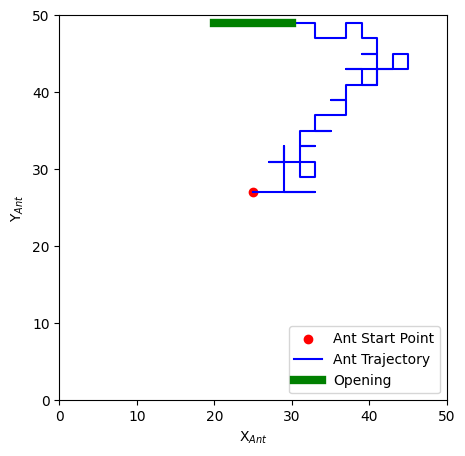

In [ ]:
# Let's visualize the last escape event
plt.figure(figsize=(5,5))
X_plot[ X_plot==0 ] = np.nan
Y_plot[ Y_plot==0 ] = np.nan
plt.scatter(X_plot[0], Y_plot[0], c='red', label="Ant Start Point")
plt.plot(X_plot,Y_plot, c='b', label="Ant Trajectory")
plt.plot(x_open, [y_open,y_open], 'g', label="Opening", linewidth=6)
plt.xlabel("X$_{Ant}$")
plt.ylabel("Y$_{Ant}$")
plt.xlim([0,x])
plt.ylim([0,y])
plt.legend(loc="lower right")
plt.show()

---
### Question 9: /5 Mark(s)
Explore the "ant" dataframe. Do you see any trend in probability? What value for probability would you report if you are asked what is the probability of the escape event?

Probability of escape event is about 31.4%.



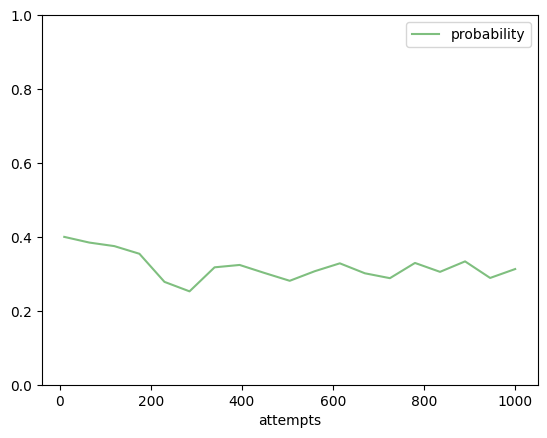

In [ ]:
fig, ax = plt.subplots(dpi = 100)
ant.plot.line('attempts','probability', ax = ax, alpha = 0.5, c='g')
ax.set_ylim([0,1])
print("Probability of escape event is about {}%.\n".format((ant.probability.tail(5).mean()*100).round(1)))

#### Written Answer:
As the number of attempts goes up the probability converges to a value about 31%.

---
### Question 10: /5 Mark(s)
Now scatter plot `attempts` versus `escapes` and use what you have learned so far to apply linear regression (ordinary least squares) to the data, and plot the predictions over the same range. Report your fit coefficients and compare them against your answer to the previous question and report what you witness and explain why?

[0.31]


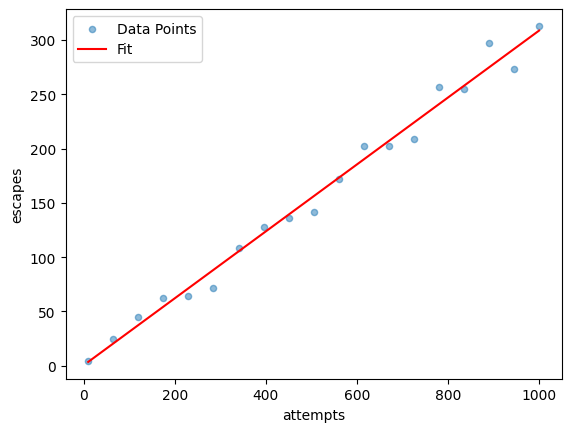

In [ ]:
fig, ax = plt.subplots(dpi = 100)
ant.plot.scatter('attempts','escapes', ax = ax, alpha = 0.5, label='Data Points')

x = ant.attempts.values
X = x.reshape(-1,1)
y = ant.escapes.values

from sklearn.linear_model import LinearRegression
ols_fit = LinearRegression().fit(X, y)
print(ols_fit.coef_.round(2))

newx = np.linspace(x.min(),x.max(),1001)
newX = newx.reshape(-1,1)
y_predicted_ols = ols_fit.predict(newX)

ax.plot(newx, y_predicted_ols, color = 'red', label='Fit')
plt.legend()
plt.show()

#### Written Answer:
Y-intercept is zero which makes sense because you do not expect to see any escape without any attempt made. The other coefficient (slope i.e., $\Delta escapes \div \Delta attempts$) is the same as the probability of escape event, this makes sense because we are witnessing a linear relationship between escapes and attempts, and probability remains the same as the number of attempts goes to infinity.

---
### Question 11: /8 Mark(s)
You gain 2 dollars every time the ant escapes, otherwise you loose a dollar. What would be the expected value of the bet and how would you interpret it?

#### Written Answer:

X = {escape, stay}

$P(X=escape)=0.31$

$P(X=stay)= 1-0.31 = 0.69$

$E(X)=\sum x P(X=x) = (2\times0.31)+(-1\times0.69)=-0.07$

If I make this bet infinite number of times, **on average**, I expect to lose 7 cents every time I bet.

---
### Question 12: /12 Mark(s)
This question is totally independent of the previous questions. The joint probability density function (PDF) of $X$ and $Y$ is given by the following function:

$f_{X,Y}(x,y)=\begin{cases}
    e^{-(\frac{x}{y}+y)}y^{-1}& \text{if }\;\;0<x,y<\infty,\\
    0              & \text{otherwise.}
\end{cases}
$

For $y>0$, find:

**A)** $P(X>1 \mid Y=y)$;

**B)** $E \bigr[ X \mid Y=y \bigr]$.

**A)**

We need to calculate the conditional PDF:

$f_{X \mid Y}(x \mid y)=\frac{f_{X,Y}(x,y)}{f_Y(y)}$

The joint PDF (numerator) is a given, we need to find the marginal density for Y (denominator):

$f_Y(y)=∫_0^\infty\frac{1}{y} e^{-(\frac{x}{y}+y)}dx=\frac{1}{y}e^{-y}∫_o^∞ e^{-\frac{x}{y}}dx = -e^{-\frac{x}{y}-y}|_0^∞=e^{-y}$

Substitute them into the conditional PDF:

$f_{X \mid Y}(x \mid y)=\frac{f_{X,Y}(x,y)}{f_Y(y)} = \frac{\frac{1}{y}e^{-(\frac{x}{y}+y)}}{e^{-y}}=\frac{1}{y}e^{-\frac{1}{y}x}$

Therefore,

$f_{X \mid Y}(x \mid y)=\begin{cases}
    \frac{1}{y}e^{-\frac{1}{y}x}& \text{if }\;\;x>0,\\
    0              & \text{otherwise.}
\end{cases}
$

Thus, the confitional distribution of $X \mid Y=y$ is exponential with parameter $\frac{1}{y}$.

(Recep: If $X  \backsim Exp(\lambda)$, then, $P(X>x)=e^{-x\lambda}$)

$P(X>1 \mid Y=y) = e^{-x\lambda}\text{, where } x=1 \text{ and } \lambda=\frac{1}{y}$

$P(X>1 \mid Y=y) = e^{-\frac{1}{y}}$

or,

$P(X>1 \mid Y=y) = \int_1^\infty f_{X \mid Y}(x \mid y) dx = \int_1^\infty \frac{1}{y}e^{-\frac{1}{y}x} dx = e^{-\frac{1}{y}}$

**B)**

Recap:
$E \bigr[ X \mid Y=y \bigr] =\begin{cases}
    \sum_x xp_{X \mid Y(x \mid y)},&\text{if }X \text{ is discrete},\\
    \int_{-\infty}^\infty xf_{X \mid Y}(x \mid y)dx,              & \text{if } X \text{ is continuous}.
\end{cases}
$

$E \bigr[ X \mid Y=y \bigr] = \int_0^\infty x \frac{1}{y}e^{-\frac{x}{y}} dx = y$

---